<hr />

### Predicting Stock Exchange Price
#### Predicting Stock Price Using Machine Learning

Jamelah Guimba C0853807 <br />
Ricardo Chacón C0854802 <br />
Sulabh Shrestha C0841540 <br />

<hr />

### Data Procuring
We took the dataset from kaggle  <br />
https://www.kaggle.com/datasets/mattiuzc/stock-exchange-data <br />
From Kaggle, there are 3 set of data files and we use the indexData file as it contains the valuable data for predicting stock price using maching learning.

<hr />

### Importing Libraries

In [1]:
import numpy as np # Matrix Multiplication
import pandas as pd # Dataframe Manipulation
import matplotlib.pylab as plt # Plotting

# # Other Libraries
import datetime as dt

# # Sklearn Libraries
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


<hr />

### Data Identiying
#### We identified the types of data that we need to predict Stock Exchange Data
So we will be identifying NASDAQ Stock Exchange Price with Index name 'IXIC'. <br />
This program can be use for identifying other Stock Index such as NYA (NYSE) and SSMI (Swiss Market Index) that are in the Kaggle dataset.

In [2]:
df = pd.read_csv('indexData.csv')

In [3]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1965-12-31,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1966-01-03,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1966-01-04,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1966-01-05,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1966-01-06,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [4]:
df[df["Index"].isin(['IXIC'])]

,Index,Date,Open,High,Low,Close,Adj Close,Volume
13948,IXIC,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000e+00
13949,IXIC,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0.000000e+00
13950,IXIC,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0.000000e+00
13951,IXIC,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0.000000e+00
13952,IXIC,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0.000000e+00
...,...,...,...,...,...,...,...,...
26633,IXIC,2021-05-24,13557.209960,13708.849610,13551.009770,13661.169920,13661.169920,3.490650e+09
26634,IXIC,2021-05-25,13721.540040,13751.139650,13631.799810,13657.169920,13657.169920,4.084480e+09
26635,IXIC,2021-05-26,13693.940430,13750.160160,13679.589840,13738.000000,13738.000000,4.231140e+09
26636,IXIC,2021-05-27,13742.589840,13776.519530,13701.629880,13736.280270,13736.280270,5.057550e+09


<hr />

### Data Imputation
#### Now we impute the data for machine learning
Before we train our data, we are converting string to actual datetime. <br />
Because the encoding takes datetime as a datatype, but our date column is a string datatype. To fit in our model, we first need to convert string datatype into date datatype.

In [5]:
df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df_IXIC = df[df["Index"].isin(['IXIC'])].sort_values('Date')

In [7]:
df_IXIC

,Index,Date,Open,High,Low,Close,Adj Close,Volume
13948,IXIC,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0.000000e+00
13949,IXIC,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0.000000e+00
13950,IXIC,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0.000000e+00
13951,IXIC,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0.000000e+00
13952,IXIC,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0.000000e+00
...,...,...,...,...,...,...,...,...
26633,IXIC,2021-05-24,13557.209960,13708.849610,13551.009770,13661.169920,13661.169920,3.490650e+09
26634,IXIC,2021-05-25,13721.540040,13751.139650,13631.799810,13657.169920,13657.169920,4.084480e+09
26635,IXIC,2021-05-26,13693.940430,13750.160160,13679.589840,13738.000000,13738.000000,4.231140e+09
26636,IXIC,2021-05-27,13742.589840,13776.519530,13701.629880,13736.280270,13736.280270,5.057550e+09


In [8]:
df_IXIC_data_close = df_IXIC[["Date","Close"]]

In [9]:
df_IXIC_data_close

,Date,Close
13948,1971-02-05,100.000000
13949,1971-02-08,100.839996
13950,1971-02-09,100.760002
13951,1971-02-10,100.690002
13952,1971-02-11,101.449997
...,...,...
26633,2021-05-24,13661.169920
26634,2021-05-25,13657.169920
26635,2021-05-26,13738.000000
26636,2021-05-27,13736.280270


<hr />

### Data Cleaning
We make sure to process only valuable data in our training. Thus, we remove the row data with null values. 

In [10]:
df_IXIC_data_close.isnull().sum()

Date     0
Close    0
dtype: int64

In [11]:
df_IXIC_data_close_withoutnan = df_IXIC_data_close.dropna()

In [12]:
df_IXIC_data_close_withoutnan.isnull().sum()

Date     0
Close    0
dtype: int64

We found out that there were no null values for the NASDAQ Stock Index.

<hr />

## Identifying Features
So to train our datalabel, the X_value as raw date value wont be accepted so it will be manpulated to fit for machine learning algorithm. So, it will be our X value to train which will predict our close which is y (close)

In [13]:
df_IXIC_data_close_withoutnan.Date = df_IXIC_data_close_withoutnan.Date.map(dt.datetime.toordinal)

<hr />

### Data Splitting
We are splitting the data into 70/30. 70% of the data is for training and 30% of the data is for testing.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df_IXIC_data_close_withoutnan['Date'], df_IXIC_data_close_withoutnan['Close'], test_size=0.3, random_state=42)

<hr />

### Data Training
#### We need to convert the Series into ndarray for the algorithm to fit.

In [15]:
X_train = X_train[:, np.newaxis]

C:\Users\SulabhShrestha\AppData\Local\Temp\ipykernel_3440\2404535186.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_train = X_train[:, np.newaxis]


In [16]:
linear_reg = LinearRegression().fit(X_train, y_train)

In [17]:
X_test = X_test[:, np.newaxis]

C:\Users\SulabhShrestha\AppData\Local\Temp\ipykernel_3440\4169426711.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_test = X_test[:, np.newaxis]


<hr />

## Linear Regression
Linear regression is one of the prediction model which are relatively simple but is proven to be reliable to predict the future. This model can be quickly trained and easily understood. <br />

The advandatages of Linear Regression are: 
- easy to implement and interpret
- less complex
- can be prone to over-fitting but can avoided reduction, regularization and cross-validation techniques.

We follow the assumptions to consider for a successful linear-regression analysis:
- check for valid cases
- check for regression coefficient and mean absolute error
- plotting of data


#### Before using any ML algorithm, we will try to use our own algorithm here

#### So, this is how the data looks like as the Ground Truth

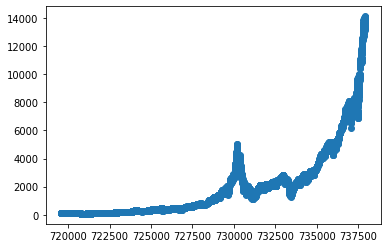

In [19]:
plt.scatter(X_train, y_train, label="original")

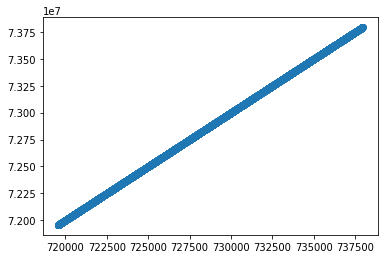

In [21]:
# Implementing the y=mx+c as the basic Linear Regression Algorithm
own_x = list(X_train)
m = 100
c = 2
own_y = []
for i in range(len(own_x)):
    own_y.append(m*own_x[i]+c)
plt.scatter(own_x, own_y, label="model")

We start creating a model.

In [22]:
pred_lr = linear_reg.predict(X_test)

In [24]:
print("Coefficient of determination: %.2f" % r2_score(y_test, pred_lr))

Coefficient of determination: 0.64


The ideal is 1 and worst is 0.

In [25]:
from sklearn.metrics import mean_absolute_error

model_error = mean_absolute_error(y_test, pred_lr)
print(f"The mean absolute error of the optimal model is {model_error:.2f} ")

The mean absolute error of the optimal model is 1055.07 


Our prediction is +/-1055.07 of the close value.

<hr />

## Decision Tree
Decision Treee is a regression model that transforms data into a tree representation. This is one of popular regression model as it requires less effort for data preparation and processing.

The advantages of Decision Tree are:
- does not require normalization of data
- does not require scaling of data
- missing values in the data does not affect the process to a considerable extent
- intuitive and easy to explain

For decision tree, we have applied the regression coefficient.


In [26]:
from sklearn.metrics import accuracy_score

In [27]:
tree = DecisionTreeRegressor(criterion='mse',max_depth=25).fit(X_train, y_train)
pred_tree = tree.predict(X_test)

C:\Users\SulabhShrestha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


In [29]:
print("Coefficient of determination: %.2f" % r2_score(y_test, pred_tree))

Coefficient of determination: 1.00


<hr />

## Random Forest
Random forest is a supervised learning algorithm that uses ensemble technique that is capable of performing both regression and classification. This method uses multiple decision tree in parallel and randomly perform row and feature sampling forming sample dataset for every model.

Here are the advantages of Random Forest:
- one of the most accurate machine learning algorithm
- can run efficiently on large database
- can handle thousands of input variables without variable deletion

We have applied the following checks for this regression model: regression coefficient and MSE (mean squared error).


In [30]:
model_rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

In [31]:
pred_model_rf = model_rf.predict(X_test)

In [33]:
print("Coefficient of determination: %.2f" % r2_score(y_test, pred_model_rf))

Coefficient of determination: 1.00


<hr />

## Plotting all the predictions only to compare
#### We plot the original data first in blue dots.

In [34]:
sample_sequence = list(range(1, 3808, 1))

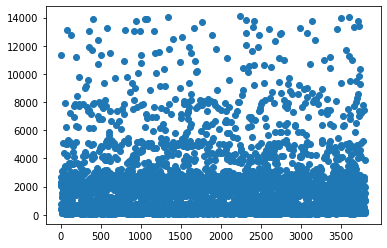

In [35]:
plt.scatter(sample_sequence, y_test)

#### We plot the original data, decision tree, and random forest.

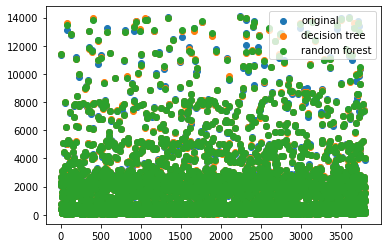

In [36]:
# # Comparing
plt.scatter(sample_sequence, y_test, label="original")
plt.scatter(sample_sequence, pred_tree, label="decision tree")
plt.scatter(sample_sequence, pred_model_rf, label="random forest")
plt.legend()

## Plotting all the predictions with y_test to compare
#### We plot the Ground Truth first.

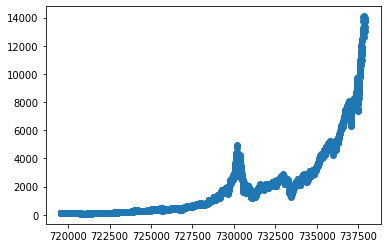

In [37]:
plt.scatter(X_test, y_test, label='GT')

#### We plot all the prediction in this graph, we can see Linear Regression, Decision Tree, and Random Forest

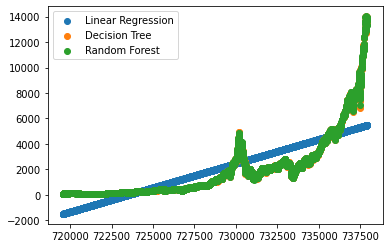

In [38]:
# plt.scatter(y_test, X_test, label='GT')
plt.scatter(X_test,pred_lr,label='Linear Regression')
plt.scatter(X_test,pred_tree,label='Decision Tree')
plt.scatter(X_test,pred_model_rf,label='Random Forest')
plt.legend()

<hr />

### Predicting our own dataset
#### We will try to predict for two random dates and compare how it does with the actual GT

In [39]:
# # Try to Predict on Some Random Dates
df = pd.DataFrame({'Date':['11/8/2011', '04/23/2008']})
# # Converting to dataframe
df['Date']= pd.to_datetime(df['Date'])
df.Date = df.Date.map(dt.datetime.toordinal)
X_own = df.Date[:, np.newaxis]
Y_own = tree.predict(X_own)
Y_own

C:\Users\SulabhShrestha\AppData\Local\Temp\ipykernel_3440\1745373591.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_own = df.Date[:, np.newaxis]


array([2727.48999 , 2376.939941])

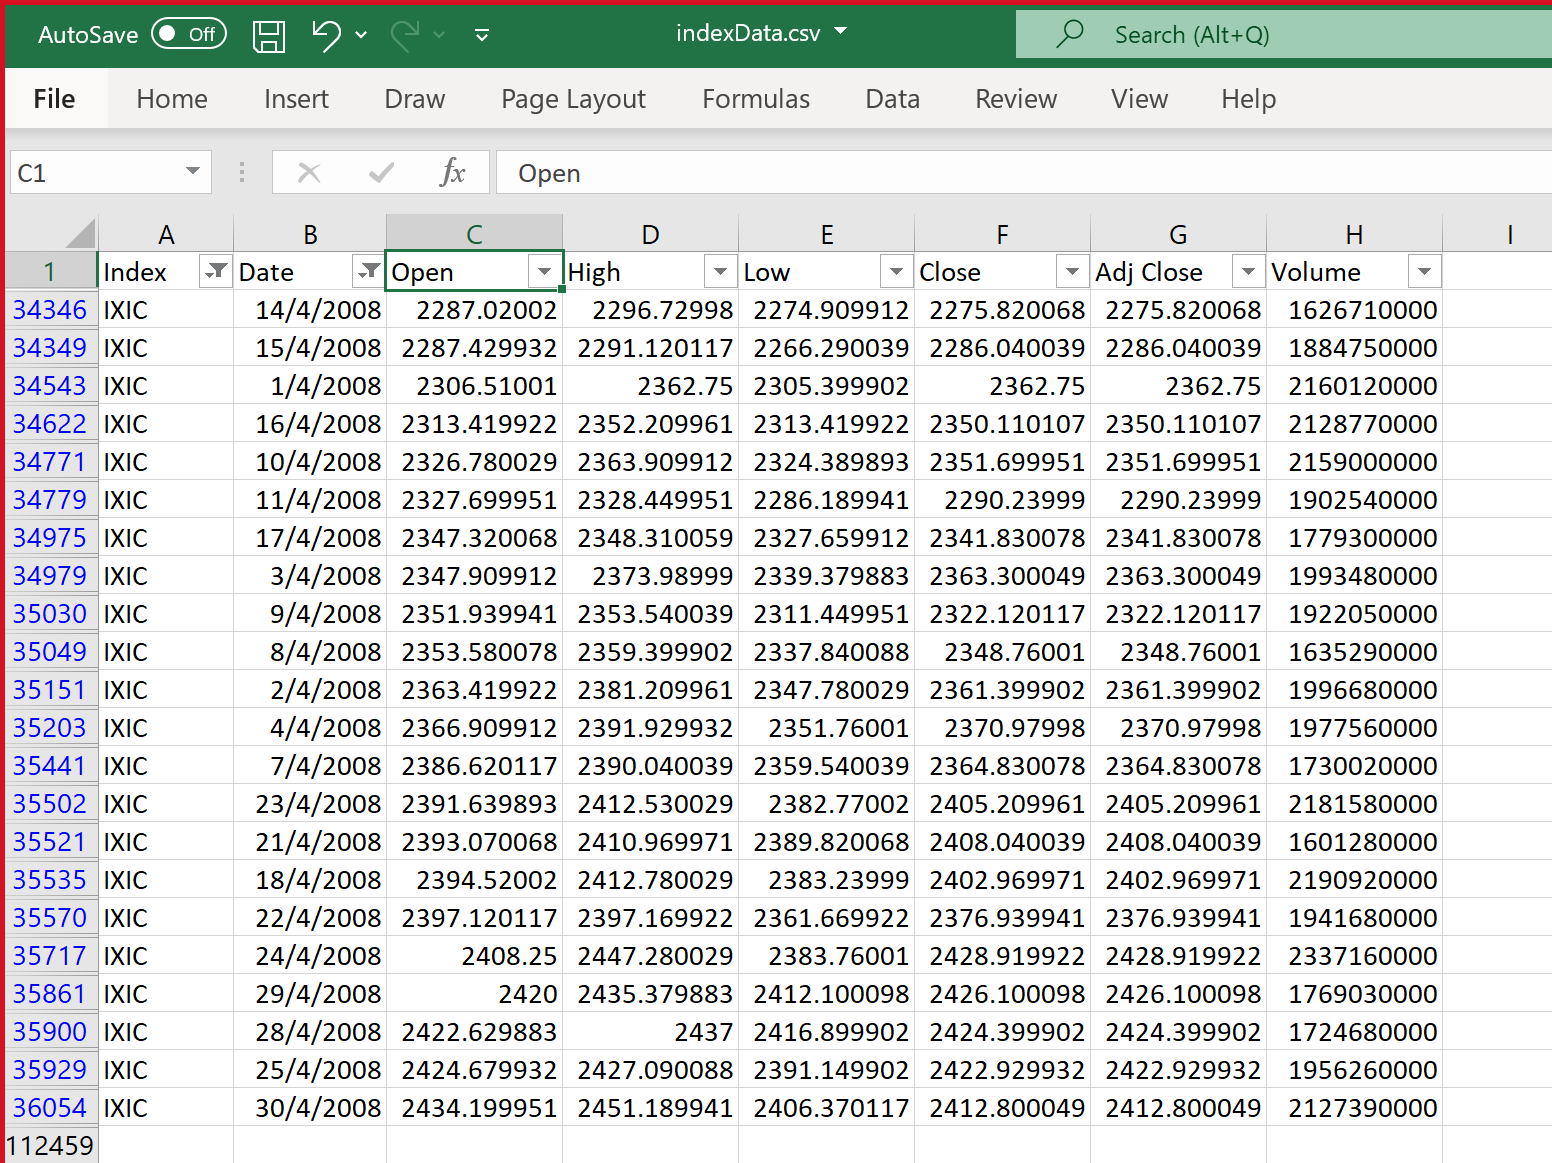

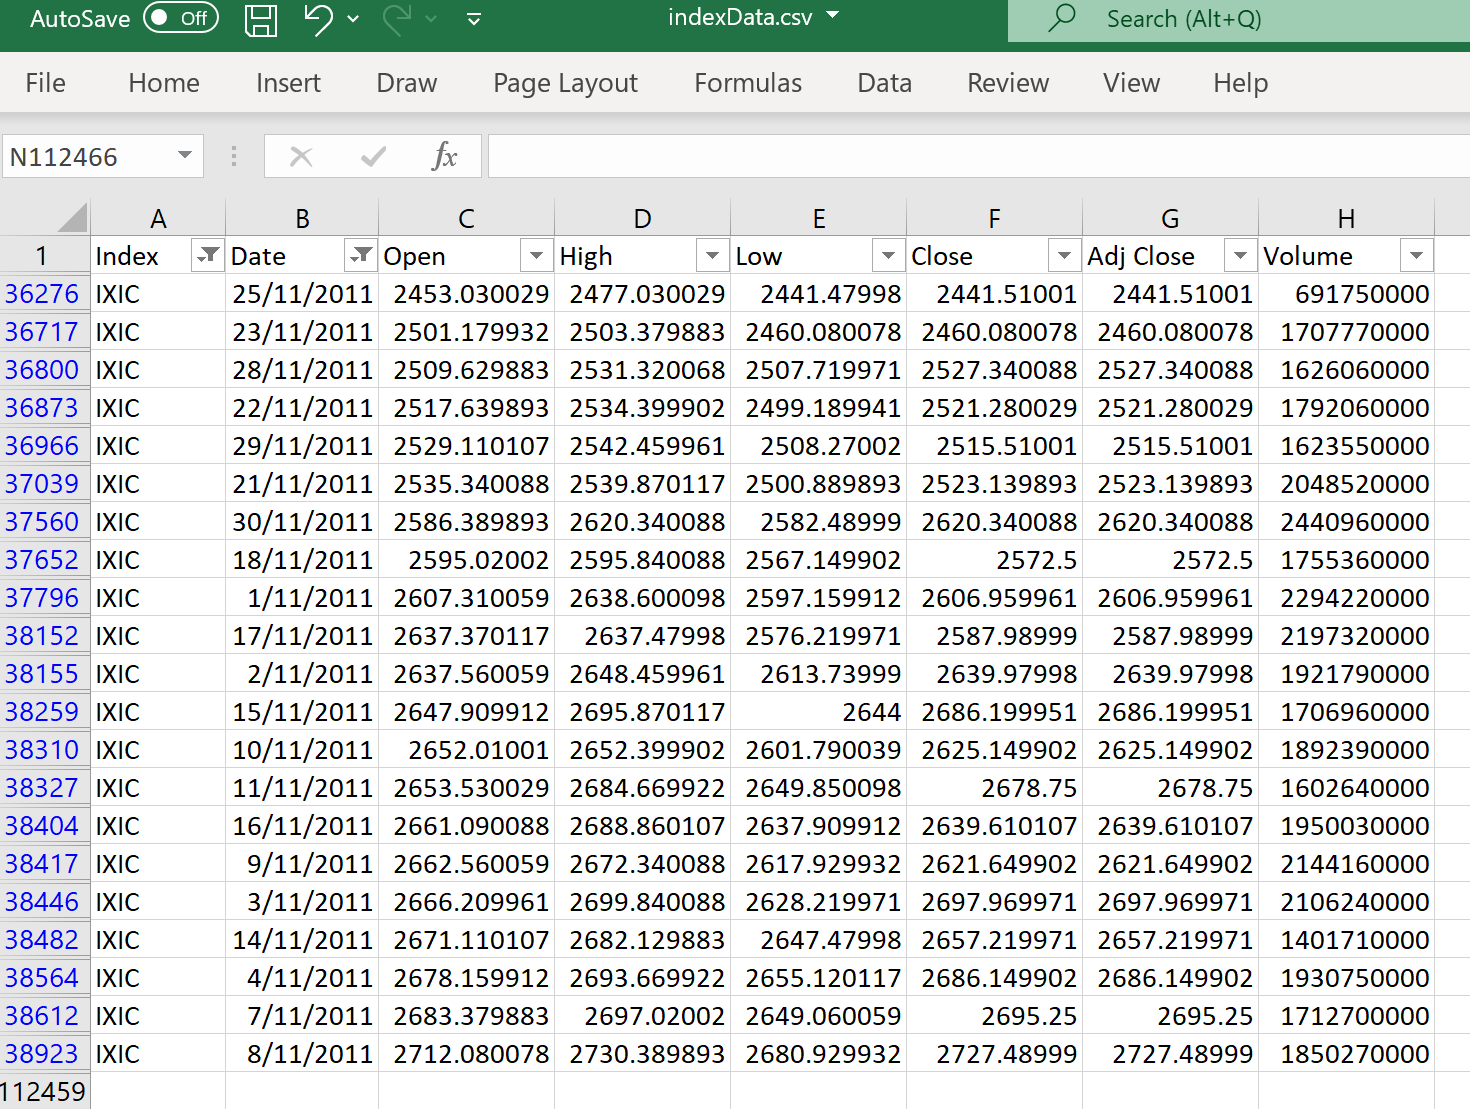